# Tarea 2. Optimización 
Guillermo Segura Gómez

## Ejercicio 1

Estimar la cantidad de iteraciones que requiere el algoritmo de descenso máximo con paso exacto para alcanzar el minimizador $x_*$ de la función cuadrática
$$
f(x)=\frac{1}{2} x^{\top} A x-b^{\top} x
$$
donde A es una matriz simétrica y definida positiva que su información y la del arreglo b está almacenada en archivo en formato $npz$ contenido en el archivo datosTarea02.zip.

Para hacer esto, calculamos el minimizador $x_*$ de $f(x)$ resolviendo el sistema de ecuaciones $A x_*=b$ y definimos
$$
q(x)=\frac{1}{2}\left(x-x_*\right)^{\top} A\left(x-x_*\right) .
$$

Sabemos que $q(x)$ y $f(x)$ sólo difieren en una constante y podemos usar $q(x)$ para estimar la manera en que decrece la función mediante el resultado de la Proposición 6 de la Clase 6 :
$$
q\left(x_{k+1}\right) \leq\left(\frac{\lambda_{\max }(A)-\lambda_{\min }(A)}{\lambda_{\max }(A)+\lambda_{\min }(A)}\right)^2 q\left(x_k\right) .
$$

Si
$$
c=\frac{\lambda_{\max }(A)-\lambda_{\min }(A)}{\lambda_{\max }(A)+\lambda_{\min }(A)},
$$
entonces
$$
q\left(x_{k+1}\right) \leq c^2 q\left(x_k\right) \leq c^4 q\left(x_{k-1}\right) \leq c^6 q\left(x_{k-2}\right) \leq \ldots \leq c^{2 k} q\left(x_1\right) \leq c^{2(k+1)} q\left(x_0\right) .
$$

Como
$$
2 q\left(x_k\right)=\left(x-x_*\right)^{\top} A\left(x-x_*\right)=\left\|x-x_*\right\|_{A}^2,
$$
$q\left(x_k\right)$ es una medida de la distancia al cuadrado de $x_k$ a $x_*$, de modo dada una tolerancia $\tau>0$ podemos buscar el valor $k$ para el cual se cumpla
$$
\left\|x_k-x_*\right\|_{A}=\sqrt{2 q\left(x_k\right)} \leq c^k \sqrt{2 q\left(x_0\right)}<\tau
$$

y ese $k$ es la estimación de la cantidad de iteraciones que requiere el algoritmo.

Nota: Cada archivo npz en el ZIP tiene dos arreglos que corresponden a la matriz A y el vector
b. Para leer los datos puede hacer, por ejemplo:
npzfile $=$ np.load("datosTarea02/matA_vecb1.npz") $A=$ npzfile['arr_0'] $b=$ npzfile['arr_1']
$b=n p z f i l e\left[' \operatorname{arr} 1^{prime}\right]$

### Ejercicio 1.1 

Escriba una función que reciba como parámetro el nombre de un archivo npz, lea el archivo y cree la matriz $A$ y el vector $b$ del archivo $npz$, y calcule el minimizador $x_*$ de $f(x)$ resolviendo el sistema de ecuaciones $Ax x_*=b$. Use la factorización de Cholesky para resolver el sistema de ecuaciones y de esta manera saber si la matriz es definida positiva, y en este caso devolver $A, b$ y $x_*$. En caso contrario devolver $A, b$ y None.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npzfile = np.load("datosTarea02/matA_vecb1.npz")
A = npzfile['arr_0']
b = npzfile['arr_1']

print(A)

[[6. 4.]
 [4. 6.]]


Se implementó el método Cholesky descrito en la página 324 del libro Buden. [1] Además se implementaron las funciones de sustitución hacía atras y sustitución hacia adelante, para poder solcuionar un sistema $Ax = B$.

In [3]:
def Cholesky(MatA):
    # Dimensiones de la matriz
    dimN = MatA.shape[0]

    # Inicializar la matriz L
    MatL = np.zeros((dimN, dimN))

    # Paso 1. Determinar l_11 = sqrt(a_11)
    MatL[0, 0] = np.sqrt(MatA[0, 0])

    # Paso 2. Para j=2,...,n determine l_{j 1} = a_{j 1} / l_{11}
    for j in range(1, dimN):
        MatL[j, 0] = MatA[j, 0] / MatL[0, 0]

    # Paso 3. Para i=2,...,n-1 haga los pasos 4 y 5
    for i in range(1, dimN):
        # Paso 4. Determinar l_{i i} = (a_{i i} - sum_{k=1}^{i-1} l_{i k}^2)^(1/2)
        sum_k = np.sum(np.square(MatL[i, :i]))
        MatL[i, i] = np.sqrt(MatA[i, i] - sum_k)

        # Paso 5. Para j=i+1,...,n determine l_{j i} = (a_{j i} - sum_{k=1}^{i-1} l_{j k} * l_{i k}) / l_{i i}
        for j in range(i+1, dimN):
            sum_k = np.sum(MatL[j, :i] * MatL[i, :i])
            MatL[j, i] = (MatA[j, i] - sum_k) / MatL[i, i]

    return MatL

def sustitucion_hacia_adelante(L, b):
    y = np.zeros_like(b)
    for i in range(len(b)):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

def sustitucion_hacia_atras(LT, y):
    x = np.zeros_like(y)
    for i in range(len(y) - 1, -1, -1):
        x[i] = (y[i] - np.dot(LT[i, i + 1:], x[i + 1:])) / LT[i, i]
    return x


In [4]:
# Ejemplo burden de factorización Cholesky
matrix = np.array([[4, -1, 1], [-1, 4.25, 2.75], [1, 2.75, 3.5]])
L = Cholesky(matrix)
print(L)

[[ 2.   0.   0. ]
 [-0.5  2.   0. ]
 [ 0.5  1.5  1. ]]


Ahora se implementa la función para el ejercicio 1.

In [5]:
# Ejercicio 1

def Minimizer(fileName):
    npzfile = np.load("datosTarea02/" + fileName + ".npz")
    A = npzfile['arr_0']
    b = npzfile['arr_1']

    try:
            # Calcular L por factorización Cholesky
            L = Cholesky(A)

            # Resolver Ly = b para y usando sustitución hacia adelante
            y = sustitucion_hacia_adelante(L, b)

            # Resolver L^Tx = y para x usando sustitución hacia atrás
            x = sustitucion_hacia_atras(L.T, y)

    except (ValueError, np.linalg.LinAlgError):
        # En caso de error (matriz no definida positiva), devolver None para x
        x = None

    return A, b, x

    

Para imprimir el sistema se implementa una función.

In [6]:
def ImprimirSistema(A, b, x):
    # Imprimir la matriz A
    print(f"Matriz A: \n" , A)

    # Imprimir el vector b
    print("\nVector b: \n", b)

    # Comprobar si x es None (lo que significa que la matriz A no es definida positiva)
    if x is not None:
        # Imprimir la solución x
        print("\nLa solución del sistema es:")
        print("Vector x: \n", x)
    else:
        print("\nNo se encontró solución: La matriz A no es definida positiva.")

Se resuelven todos los sistemas utilizando un ciclo.

In [7]:
import glob 
import os

# Especifica la ruta de la carpeta y el patrón de búsqueda
path = "datosTarea02/*.npz"

for filename in glob.glob(path):

    # Eliminar la ruta completa y solo conservar el nombre del archivo
    base_name = os.path.basename(filename)
    name_without_ext = os.path.splitext(base_name)[0]

    # Resolver el sistema
    A, b, x = Minimizer(name_without_ext)

    # Imprimir sistema
    print("Para el sistema " + name_without_ext)
    ImprimirSistema(A, b, x)

Para el sistema matA_vecb4
Matriz A: 
 [[1.79 0.03 0.07 ... 0.04 0.06 0.04]
 [0.03 1.75 0.04 ... 0.03 0.05 0.04]
 [0.07 0.04 1.76 ... 0.06 0.07 0.04]
 ...
 [0.04 0.03 0.06 ... 1.76 0.03 0.05]
 [0.06 0.05 0.07 ... 0.03 1.81 0.05]
 [0.04 0.04 0.04 ... 0.05 0.05 1.78]]

Vector b: 
 [ 1.73 -1.58  1.35 -1.52  1.93 -1.19  1.82 -1.41  1.76 -1.31  2.37 -2.07
  1.65 -1.53  1.89 -1.6   1.75 -1.26  1.72 -1.42  1.97 -1.3   1.09 -1.28
  1.85 -2.07  1.71 -1.42  1.49 -1.91  1.46 -1.53  1.56 -1.76  1.93 -1.38
  1.97 -1.81  1.53 -1.65  2.12 -1.17  1.68 -3.11  1.73 -2.18  1.75 -1.22
  2.01 -1.94  2.01 -2.1   1.85 -2.3   1.32 -1.04  1.45 -2.23  2.05 -1.93
  1.46 -1.74  1.67 -1.14  2.24 -1.2   1.73 -1.53  2.11 -1.23  2.06 -1.74
  1.55 -1.33  1.69 -1.43  1.59 -1.44  1.83 -1.03  2.05 -2.23  1.52 -2.06
  1.01 -2.06  1.76 -1.84  1.73 -1.64  1.9  -1.4   1.47 -1.19  1.3  -1.44
  2.1  -1.97  1.43 -1.66  1.69 -1.3   1.61 -1.53  1.82 -1.65  2.25 -1.29
  1.55 -1.1   0.72 -2.56  1.7  -2.08  1.53 -1.41  2.21 -0.87  2

### Ejercicio 2.1
Programe la función que evalua la función $q(x)=\frac{1}{2}\left(x-x_*\right)^{\top} A\left(x-x_*\right)$. La función recibe como parámetros el punto $x$, la matriz $A$ y el punto $x_*$ y devolver el valor de $q(x)$.}}

In [8]:
def q(x, A, x_star):
    diff = x - x_star  # Diferencia entre x y x_star
    return 0.5 * np.dot(diff.T, np.dot(A, diff))  # Calcula q(x)

### Ejercicio 1.3 y 1.4

Programe una función estima la cantidad de iteraciones que el algoritmo requiere. Esta función recibe como argumentos la matriz $A$, el punto $x_0$, el punto $x_*$ y una tolerancia $\tau>0$. La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple con $c^k \sqrt{2 q\left(x_0\right)}<\tau$. La función debe devolver $k$ y $c$.

Pruebe la función del punto anterior usando los datos de cada archivo npz contenidos en el archivo datosTarea02.zip. Use la función del Punto 1 y si se pudo calcular $x_*$, defina $n$ como el tamaño del vector $b$, el punto inicial $x_0=(10,10, \ldots, 10)^{\top}$ de dimensión $n$ y ejecute la función del Punto 3 usando como tolerancia $\tau=\sqrt{\epsilon_m}$, donde $\epsilon_m$ es el épsilon de la máquina.
Imprima el valor $n, q\left(x_0\right), k, c$.

---

Para calcular 

Para calcular el número de iteraciones $ k $ necesarias para que el algoritmo de descenso máximo alcance una cierta tolerancia $ \tau $ con respecto a la distancia al minimizador $ x_* $, se puede usar la relación proporcionada:  

$$
\sqrt{2 q\left(x_k\right)} \leq c^k \sqrt{2 q\left(x_0\right)}<\tau
$$

Despejando para $k$

$$ 
c^{2k} q\left(x_0\right) < \frac{\tau^2}{2} 
$$

Tomando logaritmos en ambos lados para resolver para $k$:

$$ 
2k \log c < \log\left(\frac{\tau^2}{2 q\left(x_0\right)}\right) 
$$

$$ 
k > -\frac{1}{2 \log c} \log\left(\frac{2 q\left(x_0\right)}{\tau^2}\right) 
$$

In [9]:
def NoIterations(A, x0, x_star, tau):
    
    # Calcula los valores propios de A
    valores_propios = np.linalg.eigvals(A)
    
    # Encuentra el valor propio máximo y mínimo
    lambda_max = np.max(valores_propios)
    lambda_min = np.min(valores_propios)

    # Calcula c
    c = (lambda_max - lambda_min) / (lambda_max + lambda_min)
    # print(f"El valor de c: ", c)

    # Despejar k para calcularlo
    if c < 1:  # Verificar que c sea menor que 1 para evitar el logaritmo de números no positivos
        k = -(1 / (2 * np.log(c))) * np.log((2 * q(x0, A, x_star)) / (tau ** 2))
        print(f"El valor de q: ", q(x0, A, x_star))
        k = np.ceil(k)  # Redondear k al entero más cercano hacia arriba
    else:
        k = np.inf  # Si c no es menor que 1, el algoritmo no converge

    return c, k

Ahora implementamos todos los ejemplo como arriba realizamos la factorización Cholesky

In [10]:
# Especifica la ruta de la carpeta y el patrón de búsqueda
path = "datosTarea02/*.npz"

# Obtener el épsilon de la máquina para números de punto flotante de doble precisión
epsilon_m = np.finfo(float).eps

# Calcular la tolerancia como la raíz cúbica del épsilon de la máquina
tolerancia = epsilon_m ** (1/3)

for filename in glob.glob(path):

    # Eliminar la ruta completa y solo conservar el nombre del archivo
    base_name = os.path.basename(filename)
    name_without_ext = os.path.splitext(base_name)[0]

    # Resolver el sistema
    A, b, x = Minimizer(name_without_ext)

    # Encontrar número de iteraciones
    x0 = np.ones(len(b))*10

    print("Solución de sistema " + name_without_ext)
    print(f"Valor de n: ", len(b))

    c, k = NoIterations(A, x0, x, tolerancia)

    print(f"c calculado: ", c)
    print(f"Número de iteraciones calculado: ", k)

Solución de sistema matA_vecb4
Valor de n:  500
El valor de q:  543978.79
c calculado:  0.9132114471426372
Número de iteraciones calculado:  209.0
Solución de sistema matA_vecb3
Valor de n:  100
El valor de q:  18134.270000000004
c calculado:  0.04175532669469306
Número de iteraciones calculado:  6.0
Solución de sistema matA_vecb2
Valor de n:  10
El valor de q:  2658.8249999999994
c calculado:  0.8610359125293413
Número de iteraciones calculado:  109.0
Solución de sistema matA_vecb1
Valor de n:  2
El valor de q:  1113.15
c calculado:  0.6666666666666666
Número de iteraciones calculado:  40.0


## Ejercicio 2

Programe el algoritmo 2 de la clase 5 para optimizar funciones de la forma

$$
f(x) = \frac{1}{2}x^T A x - b^T x
$$

con el método de descenso máximo con paso exacto. 
### Ejercicio 2.1

La función que implemente el algoritmo recibe como argumento:
- la matriz A (que se supone que es simétrica y definida positiva),
- el vector b de la función cuadrática,
- un punto inicial $x_0$
- una tolerancia $\tau$ y
- el número máximo de iteraciones $N$.

La función debe devolver: - El último punto $x_k$ generado por el algoritmo, - el número $k$ de iteraciones realizadas y - Una variable indicadora que es True si el algoritmo termina por cumplirse la condición de paro $\left(\left\|\alpha_k g_k\right\|<\tau\right)$ o False si termina porque se alcanzó el número máximo de iteraciones.

In [11]:
def DescensoMax_Func2(MatA, vecb, xk, tau, N):
    for i in range(N):
        gk = MatA @ xk - vecb

        alpha_k = np.dot(gk.T, gk) / np.dot(gk.T, (MatA @ gk))

        # Verifica la condición de parada usando la norma del paso
        if np.linalg.norm(alpha_k * gk) < tau:
            return xk, i, True 

        # Actualiza xk para la siguiente iteración
        xk = xk - alpha_k * gk

    return xk, N, False 

### Ejercicio 2.2

Programe la función que evalúa la función $f(x)$. La función recibe como argumentos la matriz A y el vector $b$, y devuelve el valor $\frac{1}{2} x^{\top} A x-b^{\top} x$.

In [12]:
def f(matA, vecb, x):
    term1 = 0.5 * x.T @ matA @ x  # Calcula 1/2 x^T A x
    term2 = vecb.T @ x            # Calcula b^T x
    return term1 - term2

### Ejercicio 2.3
Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos npz que están contenidos en el archivo datosTarea02.zip:

Para cada archivo npy haga lo siguiente: - Use la función del Punto 1 del Ejercicio 1 para obtener $A, b$ y $x_*$. Si $x_*$ no es None continúe y defina la variable $n$ como el tamaño del vector $b$. Imprima el valor de $n$ para saber la dimensión de la variable $x$. - Haga $x_0=(10,10, \ldots, 10)^{\top}$ de dimensión $n$. - Defina la tolerancia $\tau=\sqrt{\epsilon_m}$, donde $\epsilon_m$ es el épsilon de la máquina. - Calcule el punto $x_k$ con el algoritmo. Elija el número de iteraciones máximas para el algoritmo. Puede tomar como referencia el resultado en el Ejercicio 1. - Imprima los valores
$$
f\left(x_0\right), k, f\left(x_k\right),\left\|x_k-x_*\right\|,
$$
y $x_k$ si $n \leq 6$, o los primeros tres elementos y los últimos tres elementos del arreglo $x_k$ si $n>6$.

In [13]:
# Especifica la ruta de la carpeta y el patrón de búsqueda
path = "datosTarea02/*.npz"

# Obtener el épsilon de la máquina para números de punto flotante de doble precisión
epsilon_m = np.finfo(float).eps

# Calcular la tolerancia como la raíz cúbica del épsilon de la máquina
tolerancia = epsilon_m ** (1/3)

for filename in glob.glob(path):

    # Eliminar la ruta completa y solo conservar el nombre del archivo
    base_name = os.path.basename(filename)
    name_without_ext = os.path.splitext(base_name)[0]

    # Resolver el sistema
    A, b, x = Minimizer(name_without_ext)

    # Definición de n
    n = len(b)

    # Definición de x0
    x0 = np.ones(n)*10

    # Define el número máximo de iteraciones N
    N = 1000 

    # Calcula el punto x_k con el algoritmo de descenso máximo
    x_k, num_iteraciones, convergio = DescensoMax_Func2(A, b, x0, tolerancia, N)

    # Calcula y muestra los valores solicitados
    valor_inicial = f(A, b, x0)
    valor_final = f(A, b, x_k)
    norma_diferencia = np.linalg.norm(x_k - x)

    print("Solución de sistema " + name_without_ext)

    print(f"Valor de n: {n}")
    print(f"f(x0): {valor_inicial}")
    print(f"Número de iteraciones (k): {num_iteraciones}")
    print(f"f(x_k): {valor_final}")
    print(f"Norma de la diferencia ||x_k - x_*||: {norma_diferencia}")

    # Imprimir x_k 
    if n <= 6:
        print(f"x_k: {x_k}")
    else:
        # Imprime los primeros y últimos tres elementos de x_k
        print(f"x_k (primeros 3 elementos): {x_k[:3]}")
        print(f"x_k (últimos 3 elementos): {x_k[-3:]}")

Solución de sistema matA_vecb4
Valor de n: 500
f(x0): 543542.6
Número de iteraciones (k): 77
f(x_k): -436.1899999992252
Norma de la diferencia ||x_k - x_*||: 3.532614479400813e-05
x_k (primeros 3 elementos): [ 0.99999929 -1.00000012  0.99999889]
x_k (últimos 3 elementos): [-0.999998    0.99999656 -0.99999944]
Solución de sistema matA_vecb3
Valor de n: 100
f(x0): 17984.4
Número de iteraciones (k): 5
f(x_k): -149.8699999999988
Norma de la diferencia ||x_k - x_*||: 8.944448733815078e-07
x_k (primeros 3 elementos): [-0.99999999 -1.00000018 -1.00000012]
x_k (últimos 3 elementos): [-0.99999997 -0.99999993 -1.00000015]
Solución de sistema matA_vecb2
Valor de n: 10
f(x0): 2626.0
Número de iteraciones (k): 65
f(x_k): -32.824999999800625
Norma de la diferencia ||x_k - x_*||: 2.7041631131850196e-05
x_k (primeros 3 elementos): [0.99999604 0.99999779 1.00001441]
x_k (últimos 3 elementos): [0.99998744 1.00000671 0.99999931]
Solución de sistema matA_vecb1
Valor de n: 2
f(x0): 1110.0
Número de iteraci

### Ejercicio 2.4
Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

Los números de iteraciones calculados fueron:

Solución de sistema matA_vecb4: Número de iteraciones calculado:  209.0

Solución de sistema matA_vecb3: Número de iteraciones calculado:  6.0

Solución de sistema matA_vecb2: Número de iteraciones calculado:  109.0

Solución de sistema matA_vecb1: Número de iteraciones calculado:  40.0

La única buen aproximación fue la del sistema 3, ya que se calcularon 6 iteraciones y el valor real fue de 5. Para los demás casos el número de iteraciones calculado dista bastante del real. Sin embargo, si nos referimos únicamente al número calculado como cota superior, éste si fue un buen parámetro de referencia ya que en todos los casos las iteraciones calculadas fueron un número superior a las reales, siendo un buen estimador para este valor. 

## Ejercicio 3

Programar el algoritmo 1 de la clase 5 de descenso máximo, usando el método de la sección dorada para obtener $\alpha_k \epsilon [0,1]$ 

$$
a_k = \text{arg} \min_{\alpha_k \epsilon [0,1]} f(x_k - \alpha \nabla f(x_k))
$$

### Ejercicio 3.1

La función que implementa el algoritmo recibe como entrada:
- La función $f(x)$,
- el gradiente $\nabla f(x)$ de la función $f$,
- un punto inicial $x_0$,
- las tolerancia $\tau_1>0$ y $\tau_2>0$,
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{g s}$ para el método de la sección dorada.

La función devuelve - El último punto $x_k$ generado por el algoritmo, - el número $k$ de iteraciones realizadas y - Una variable indicadora que es True si el algoritmo termina por cumplirse la condición de paro $\left(\left\|\alpha_k p_k\right\|<\tau_1\right.$ ) o False si termina porque se alcanzó el número máximo de iteraciones. Un arreglo que contiene la secuencia de puntos $x_0, x_1, \ldots x_k$ si la dimensión de la variable es $n=2$, y es vacío en otro caso. Es decir, sólo cuando la dimensión guardamos la secuencia de puntos.

Dentro de esta función se puede definir $phi(\alpha)=f\left(x_k-\alpha \nabla f\left(x_k\right)\right)$ y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$ en el intervalo [0,1]. Para hacer esto, puede usar una función lambda como en el ejemplo en las notas de la Ayudantía 2. Use la tolerancia $\tau_2$ para el algoritmo de la sección dorada.

In [14]:
def golden_section(f, xMin, xMax, tol, nMax):
    rho = (np.sqrt(5) - 1) / 2 
    xk = None  # Inicializar xk

    for k in range(nMax):
        b = (1 - rho) * (xMax - xMin) 
        x1 = xMin + b
        x3 = xMax - b

        if f(x1) < f(x3):
            xMax = x3
            xk = x1
        elif f(x1) > f(x3): 
            xMin = x1
            xk = x3

        if (xMax - xMin) < tol:  
            return xk, True

    return xk, False

In [15]:
def DescensoMax(f, gradf, x0, tau1, tau2, NMax, NGolden):
    xk = np.array(x0)
    sequence = []

    for k in range(NMax):
        gk = gradf(xk)
        pk = -gk

        # Definir phi(alpha) para el método de la sección dorada
        phi = lambda alpha: f(xk + alpha * pk)

        # Calcular tamaño de paso usando el método de la sección dorada
        alpha_k, convergence = golden_section(phi, 0, 1, tau2, NGolden)

        # Verificar la condición de parada
        if np.linalg.norm(alpha_k * pk) < tau1:
            return xk, k, True, sequence

        # Actualizar xk para la siguiente iteración
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, NMax, False, sequence

### Ejercicio 3.2

Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente de manera analítica y programe la función correspondiente. Use cada punto $x_0$ como punto inicial del algoritmo.

Función de Himmelblau: Para $x=\left(x_1, x_2\right)$
$$
\begin{gathered}
f(x)=\left(x_1^2+x_2-11\right)^2+\left(x_1+x_2^2-7\right)^2 . \\
x_0=(2 ., 4 .) \\
x_0=(0 ., 0 .)
\end{gathered}
$$

Función de Beale : Para $x=\left(x_1, x_2\right)$
$$
\begin{gathered}
f(x)=\left(1.5-x_1+x_1 x_2\right)^2+\left(2.25-x_1+x_1 x_2^2\right)^2+\left(2.625-x_1+x_1 x_2^3\right)^2 . \\
x_0=(2 ., 3 .) \\
x_0=(2 ., 4 .)
\end{gathered}
$$

Función de Rosenbrock: Para $x=\left(x_1, x_2, \ldots, x_n\right)$
$$
\begin{gathered}
f(x)=\sum_{i=1}^{n-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad n \geq 2 \\
x_0=(-2.1,4.5) \\
x_0=(-1.2,1.0) \\
x_0=(-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5) \\
x_0=(-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0)
\end{gathered}
$$

Use las tolerancias $\tau_1=\sqrt{n} \epsilon_m^{1 / 3}, \tau_2=\epsilon_m^{1 / 2}$, donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas $N=10000$ para el descenso máximo y $N_{g s}=200$ para el método de la sección dorada.

Para las funciones de dos variables grafique los contornos de nivel. Modifique la función contornosFnc2D, o haga la suya, y pase como argumento la secuencia de puntos que devuelve el algoritmo para visualizar la trayectoria de los puntos $x_k$.

In [16]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

In [17]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])



In [18]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx


In [19]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0]), np.array([0.0, 0.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0]), np.array([2.0, 4.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-2.1, 4.5]),
    np.array([-1.2, 1.0]),
    np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5]),
    np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancias
tau1 = np.sqrt(n) * epsilon_m**(1/3)
tau2 = epsilon_m**(1/2)

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 10000
NGolden = 200

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, secuencia = DescensoMax(func, grad_func, x0, tau1, tau2, NMax, NGolden)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:50]}")
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [ 3.58442714 -1.84812629], k = 9, f(xk) = 7.454787957081565e-11, convergió: True
Secuencia de puntos: [[2.0185580695549272, 2.422564087831168], [2.870337456772578, 2.4325844636708696], [2.9191483454738703, -1.7166015771488774], [3.574439050164983, -1.708892743369137], [3.576057814716588, -1.8464910871957199], [3.5843078523023912, -1.846394028173136], [3.584328001207576, -1.848106925422064], [3.5844268967813675, -1.848105762159447], [3.584427138307729, -1.8481262921423067]]

Resultado para x0 = [0. 0.]:
xk = [3.00000017 2.00000628], k = 14, f(xk) = 6.931124616723682e-10, convergió: True
Secuencia de puntos: [[1.7826996201516425, 2.8013851173811526], [3.000848202031971, 2.0261996931506445], [2.991698168276046, 2.011821074595092], [3.000180444353276, 2.006423257085746], [2.997956346572549, 2.0029282479158836], [3.0000432883874657, 2.001600191349801], [2.999490379665525, 2.000731336556288], [3.000010722947768, 2.0004002085776107], [2

Resultado para x0 = [2. 3.]:
xk = [2.99949463 0.49986994], k = 476, f(xk) = 4.1415964238432026e-08, convergió: True
Secuencia de puntos: [[0.6844585065291056, 0.3478566721419707], [1.7722451996156143, -0.19175753391447392], [1.9809538648594986, 0.2289698215613501], [2.157051451783589, 0.1416137332870706], [2.226970610606555, 0.2825609042317759], [2.315506954123908, 0.23864100521381726], [2.35438406585313, 0.3170117952611238], [2.411356916759044, 0.28874948601068984], [2.4372823612526187, 0.34101154490783964], [2.4785061012636604, 0.3205618390533924], [2.4975266451125147, 0.35890459442217154], [2.5294537379865267, 0.3430666462558246], [2.5442547074879123, 0.372903332960256], [2.570096631924094, 0.360084030489911], [2.582082176504773, 0.38424521269938117], [2.6036527358509605, 0.3735447896258303], [2.613640725444031, 0.39367918176100114], [2.6320583570997607, 0.3845428193434496], [2.6405633041653376, 0.4016876071156643], [2.6565636837621973, 0.3937503628084198], [2.663928532047774, 0.408

In [20]:
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

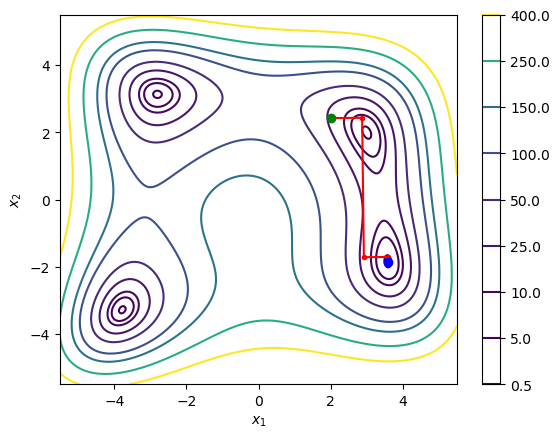

In [21]:
# Función de Himmelblau
secuencia = np.array([
    [2.01855807, 2.42256409],
    [2.87033746, 2.43258446],
    [2.91914835, -1.71660158],
    [3.57443905, -1.70889274],
    [3.57605781, -1.84649109],
    [3.58430785, -1.84639403],
    [3.584328, -1.84810693],
    [3.5844269, -1.84810576],
    [3.58442714, -1.84812629]
])
contornosFnc2D(himmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)


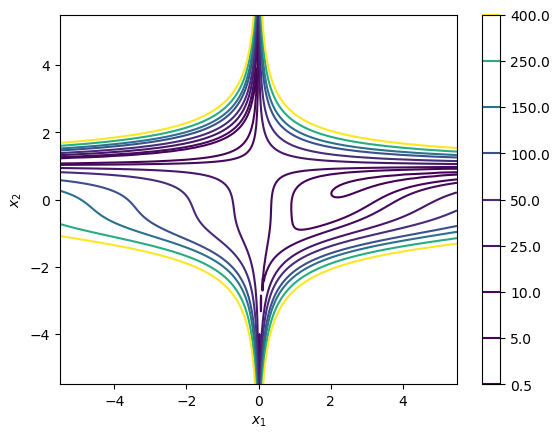

In [22]:
# Función de Beale
secuencia = []
contornosFnc2D(beale, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=None)

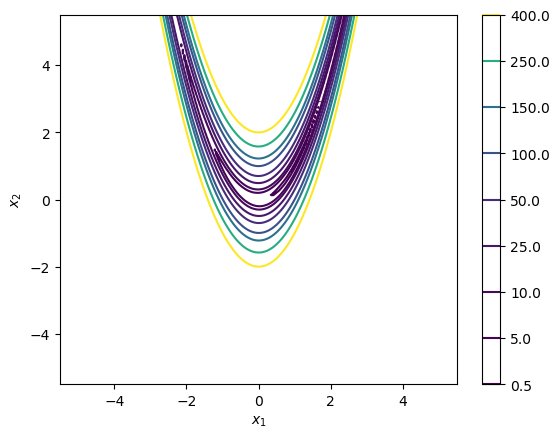

In [23]:
# Función de Rosenbrock
secuencia = []
contornosFnc2D(rosenbrock, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=None)

### Ejercicio 3.3

Repita la prueba para función de Rosenbrock usando el punto inicial $x_0=(-2.1,4.5)$ usando $\tau_2=\epsilon_m^{1 / 4}$ y $N_{g s}=50$ para relajar las condiciones de paro del método de la sección dorada y ver si podemos terminar más rápido. Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo.

In [24]:
# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-2.1, 4.5])]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancias
tau1 = np.sqrt(n) * epsilon_m**(1/3)
tau2 = epsilon_m**(1/4)

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 10000
NGolden = 50

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, secuencia = DescensoMax(func, grad_func, x0, tau1, tau2, NMax, NGolden)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:50]}")
        print()

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


Función de Rosenbrock:
Resultado para x0 = [-2.1  4.5]:
xk = [1.01786922 1.03607662], k = 10000, f(xk) = 0.0003193447538303153, convergió: False
Secuencia de puntos: [[-2.1194343305958374, 4.494959395522693], [-2.1183893667638776, 4.494793754885195], [-2.116981748234764, 4.477663847822244], [2.198121798059142, 4.8334223652524635], [2.1978045488511486, 4.833305859458063], [2.197978863165252, 4.832808347678439], [2.197666043182985, 4.832690849249358], [2.197849227466463, 4.832155314587567], [2.197511155560805, 4.832043574334124], [2.1976963427138134, 4.831565898643821], [2.1973834751674133, 4.831448440428732], [2.1975664639837866, 4.8309129979101195], [2.197228690880421, 4.830801219832426], [2.197413360257517, 4.830323703306146], [2.1971010917712457, 4.830206138230426], [2.197283196731332, 4.829670944506045], [2.1969464275835295, 4.829558968187829], [2.1971299179128145, 4.829081761334951], [2.1968188916916045, 4.828963943044999], [2.1969994297907944, 4.828429153600929], [2.19666436352505

Cuando se relajan las condiciones de paro del método de la sección dorada, como en el caso de usar $ \tau_2 = \epsilon_m^{1/4} $ y $ N_{gs} = 50 $, es posible que el algoritmo termine más rápidamente porque se requiere una menor precisión para detener la búsqueda del tamaño de paso óptimo $ \alpha_k $. Sin embargo, este enfoque puede tener varias implicaciones ya que al relajar las condiciones de paro, existe el riesgo de que el tamaño de paso $ \alpha_k $ no sea lo suficientemente preciso, lo que podría llevar a que el algoritmo de descenso máximo no converja al mínimo real de la función objetivo, lo que parece que ocurre en este caso ya que el algoritmo no convergió. 

En este caso específico, el hecho de que el algoritmo no convergiera al relajar las condiciones de paro del método de la sección dorada indica que, para la función de Rosenbrock y el punto inicial dado, es crucial una mayor precisión en la determinación del tamaño de paso $\alpha_k$. Esto subraya la importancia de elegir cuidadosamente los parámetros del algoritmo, en particular las condiciones de paro, en función de las propiedades de la función objetivo y los requisitos del problema específico. En problemas donde es esencial encontrar un mínimo preciso o cuando se trabaja con funciones complicadas como la de Rosenbrock, relajar demasiado las condiciones de paro puede llevar a resultados insatisfactorios o a la falta de convergencia.

## Ejercicio 4

Sea $f(x)=(x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia
$$
x_{k+1}=x_k-\frac{\alpha}{2^k} f^{prime}\left(x_k\right)
$$
con $0<\alpha<0.5$, para obtener el minimizador de la función $f(x)$. Muestre que la secuencia $\left\{x_k\right\}$ converge a 1. ¿Tiene este algoritmo la propiedad de descenso, es decir, $f\left(x_{k+1}\right)<f\left(x_k\right)$ a partir de un cierto $k$ ?

---

Para abordar este problema, primero definimos la función y su derivada, y luego analizamos la secuencia y la convergencia.

Dada la función $ f(x) = (x - 1)^2 $, su derivada es:

$$ 
f'(x) = 2(x - 1)
$$

La secuencia dada es:

$$ 
x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) 
$$

Sustituyendo la derivada de $ f(x) $ en la secuencia, obtenemos:

$$ 
x_{k+1} = x_k - \frac{\alpha}{2^k} \cdot 2(x_k - 1) = x_k - \frac{\alpha}{2^{k-1}} (x_k - 1) 
$$

Para mostrar que $x_k$ converge a 1, podemos analizar el comportamiento de la secuencia a medida que $ k $ se hace grande.

A medida que $ k $ aumenta, el término $ \alpha/2^{k-1} $ se hace muy pequeño debido a la condición $ 0 < \alpha < 0.5 $ y al factor $ 2^{k-1} $ en el denominador. Esto significa que el ajuste que se hace a $ x_k $ en cada paso se reduce exponencialmente. Por lo tanto, los cambios en $ x_k $ se vuelven insignificantes, y $ x_k $ se estabiliza.

Además, el signo de $ (x_k - 1) $ asegura que el ajuste siempre empuje $ x_k $ hacia 1: si $ x_k > 1 $, entonces $ x_{k+1} < x_k $; si $ x_k < 1 $, entonces $ x_{k+1} > x_k $. Por lo tanto, independientemente del valor inicial $ x_0 $, la secuencia $x_k$ se mueve hacia 1 y, debido a la reducción exponencial del término de ajuste, eventualmente converge a 1.

Para determinar si el algoritmo tiene la propiedad de descenso, necesitamos verificar si $ f(x_{k+1}) < f(x_k) $ a partir de un cierto $ k $.

Dado que la función $ f(x) $ es estrictamente convexa y su mínimo se alcanza en $ x = 1 $, cualquier movimiento hacia 1 reduce el valor de $ f(x) $. Sin embargo, debido a la reducción exponencial del término de ajuste $ \alpha/2^{k-1} (x_k - 1) $, puede haber un punto a partir del cual los ajustes sean tan pequeños que, debido a la precisión numérica o a la elección de $ \alpha $, el valor de $ f(x_{k+1}) $ no sea estrictamente menor que $ f(x_k) $ para algunos $ k $. Esto dependerá de la precisión numérica de la implementación y del valor específico de $ \alpha $.

Sin embargo, para valores de $ k $ lo suficientemente pequeños y ajustes significativos, el algoritmo debería exhibir la propiedad de descenso debido a la naturaleza convexa de $ f(x) $ y al hecho de que cada paso mueve $ x_k $ más cerca del mínimo en $ x = 1 $, reduciendo $ f(x_k) $. A medida que $ x_k $ se acerca a 1, la propiedad de descenso puede no mantenerse estrictamente en cada paso debido a la disminución del tamaño del paso.

## Referencias

[1] Burden, Richard L. Numerical analysis. Brooks/Cole Cengage Learning, 2011.